## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)






In [4]:
# Combine the data into a single dataset
# Display the data table for preview
merged_data = pd.merge(mouse_metadata, study_results )
merged_data.head(4)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1


In [7]:
# Checking the number of mice.
number_mice = merged_data["Mouse ID"].value_counts()
number_mice

g989    13
j913    10
w350    10
y260    10
f345    10
        ..
h428     1
o848     1
f932     1
b447     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
uniqe_number_mice = merged_data["Mouse ID"].unique()
uniqe_number_mice

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID  
merged_data.duplicated(subset=['Mouse ID'])



0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [11]:
#Timepoint.
merged_data.duplicated(subset=['Timepoint'])


0       False
1       False
2       False
3       False
4       False
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.drop_duplicates(subset=['Mouse ID'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [24]:
new_count = clean_df["Mouse ID"].unique()
new_count

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
 # mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]



In [37]:
# Assemble the resulting series into a single summary dataframe.
Summary_statistic_df = pd.DataFrame({"Mean of Tumor":mean, "Median of Tumor":median, "Variance of Tumor":variance, "Standard Deviation of Tumor":std, "SEM of Tumor":sem})
Summary_statistic_df

,Mean of Tumor,Median of Tumor,Variance of Tumor,Standard Deviation of Tumor,SEM of Tumor
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                      
                           mean median  var  std  sem
Drug Regimen                                         
Capomulin                  45.0   45.0  0.0  0.0  0.0
Ceftamin                   45.0   45.0  0.0  0.0  0.0
Infubinol                  45.0   45.0  0.0  0.0  0.0
Ketapril                   45.0   45.0  0.0  0.0  0.0
Naftisol                   45.0   45.0  0.0  0.0  0.0
Placebo                    45.0   45.0  0.0  0.0  0.0
Propriva                   45.0   45.0  0.0  0.0  0.0
Ramicane                   45.0   45.0  0.0  0.0  0.0
Stelasyn                   45.0   45.0  0.0  0.0  0.0
Zoniferol                  45.0   45.0  0.0  0.0  0.0

## Bar and Pie Charts

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_count = clean_df['Drug Regimen'].value_counts()
drug_regimen_count

Naftisol     25
Infubinol    25
Propriva     25
Placebo      25
Zoniferol    25
Ketapril     25
Ramicane     25
Capomulin    25
Ceftamin     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Mice tested')

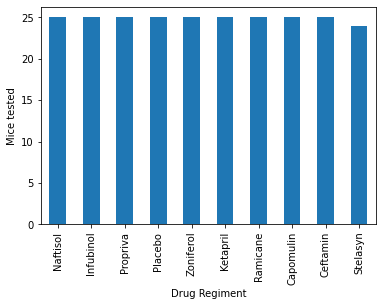

In [43]:
drug_regimen_count.plot(kind = "bar")
plt.xlabel("Drug Regiment")
plt.xticks(rotation = 90)
plt.ylabel("Mice tested")

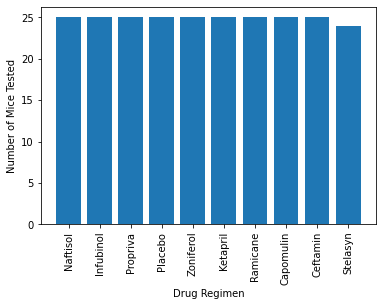

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_regimen_count.index.values,drug_regimen_count.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()


In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_sex = clean_df['Sex'].value_counts()
count_sex


Male      125
Female    124
Name: Sex, dtype: int64

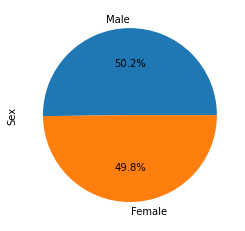

In [50]:
count_sex.plot(kind="pie",autopct='%1.1f%%')
plt.show()

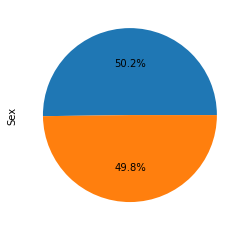

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(count_sex.values, autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()

greatest_timepoint


Mouse ID
a203    0
a251    0
a262    0
a275    0
a366    0
       ..
z435    0
z578    0
z581    0
z795    0
z969    0
Name: Timepoint, Length: 249, dtype: int64

In [64]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_clean_df = pd.merge(clean_df, greatest_timepoint)
merged_clean_df.head(4)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,k403,Ramicane,Male,21,16,0,45.0,0
2,k403,Ramicane,Male,21,16,0,45.0,0
3,k403,Ramicane,Male,21,16,0,45.0,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatements_list = (["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# Create empty list to fill with tumor vol data (for plotting)
empty_list = []

# Loop through each drug in the treatment list
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

 # Locate the rows which contain mice on each drug and get the tumor volumes
final_tumor_vol = merged_clean_df.loc[merged_clean_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    
    # add subset 
empty_list.append(final_tumor_vol)
    
    
    # Determine outliers using upper and lower bounds

    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [65]:
#Select a mouse that was treated with Capomulin
Capomulin = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
60,f966,Capomulin,Male,16,17,0,45.0,0
95,u364,Capomulin,Male,18,17,0,45.0,0
115,y793,Capomulin,Male,17,17,0,45.0,0
125,r554,Capomulin,Female,8,17,0,45.0,0
135,m957,Capomulin,Female,3,19,0,45.0,0
155,t565,Capomulin,Female,20,17,0,45.0,0
195,i738,Capomulin,Female,23,20,0,45.0,0


In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
